# 数据可视化作业题目 (基于 seaborn)

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scienceplots

## 练习1：航班乘客变化分析 (2个题)

1. 分析年度乘客总量的变化情况（提示：折线图）
2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

### 数据导入

In [2]:
flights = sns.load_dataset("flights")
flights.head()
# 年份，月份，乘客数

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


### 设置全局参数

In [4]:
# 恢复seaborn默认设置
sns.set()

# 设置随机种子，同一个种子值，产生的随机数相同
np.random.seed(sum(map(ord, "regression"))) # ord 整型

# 使用 "science" 风格
plt.style.use('science') 

# 设置默认的DPI
plt.rc('figure', dpi=200)

# 设置默认的图形大小
plt.rc('figure', figsize=(6, 3))

### 题目解答与绘图

#### 1. 分析年度乘客总量的变化情况（提示：折线图）

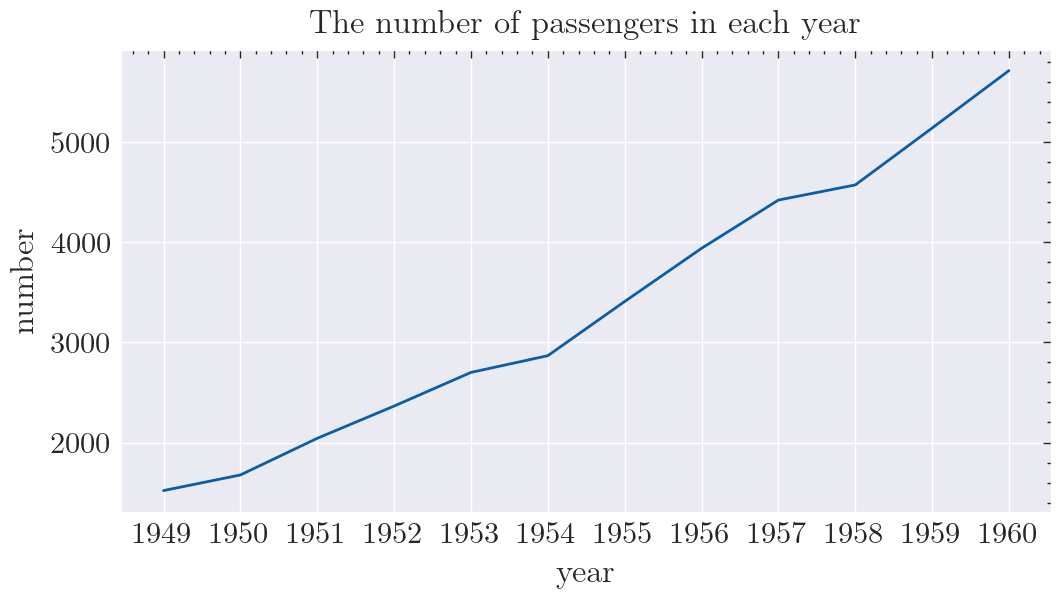

In [5]:
# plt.figure(dpi=200, figsize=(6, 3))

# 按年份对乘客数量求和
yearly_passengers = flights.groupby('year')['passengers'].sum().reset_index()

# 绘制折线图
sns.lineplot(x='year', y='passengers', data=yearly_passengers)

# 设置标题
plt.title('The number of passengers in each year')
plt.ylabel("number")

# 设置x轴标签为所有年份
plt.gca().set_xticks(yearly_passengers['year']) 

# 显示图形
plt.show()

<span style="color:red;">
结论: 年度乘客总量几乎呈线性增长趋势，说明民航行业在稳步发展中。
</span>

#### 2. 分析乘客量在一年中12个月份的分布（提示：柱状图）

/var/folders/q0/_gyj4jp52xl48pys8gd71rnm0000gp/T/ipykernel_33333/1157843496.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_passengers = flights.groupby('month')['passengers'].sum().reset_index()


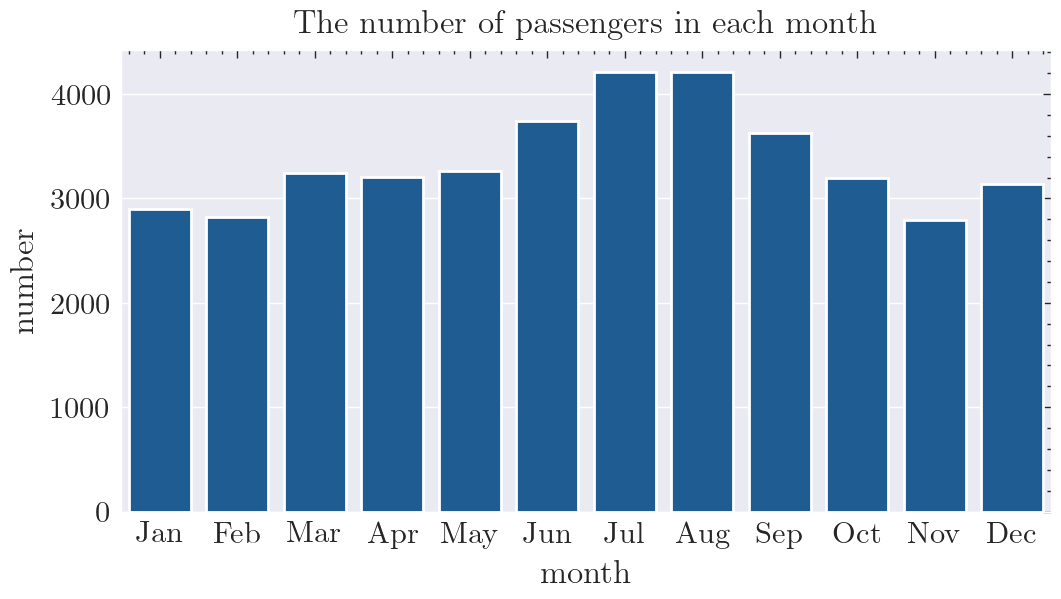

In [6]:
# 按月份对乘客数量求和
monthly_passengers = flights.groupby('month')['passengers'].sum().reset_index()

# 绘制柱状图
sns.barplot(x='month', y='passengers', data=monthly_passengers)

# 添加标题和标签
plt.title("The number of passengers in each month")
plt.ylabel("number")

# 显示图形
plt.show()

<span style="color:red;">
结论: 月度乘客量最多的是夏季，尤其是七、八月份。
</span>

## 练习2：鸢尾花花型尺寸分析 (3个题)

1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）
2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）
3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

### 数据导入

In [7]:
iris = sns.load_dataset("iris")
iris.head()
# 萼片长度，萼片宽度，花瓣长度，花瓣宽度，种类

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### 设置全局参数

In [9]:
# 恢复seaborn默认设置
sns.set()

# 设置随机种子，同一个种子值，产生的随机数相同
np.random.seed(sum(map(ord, "regression"))) # ord 整型

# 使用 "science" 风格
plt.style.use('science') 

# 设置默认的DPI
plt.rc('figure', dpi=200)

# 设置默认的图形大小
plt.rc('figure', figsize=(4, 4))

### 题目解答与绘图

#### 1. 萼片（sepal）和花瓣（petal）的大小关系（提示：散点图）

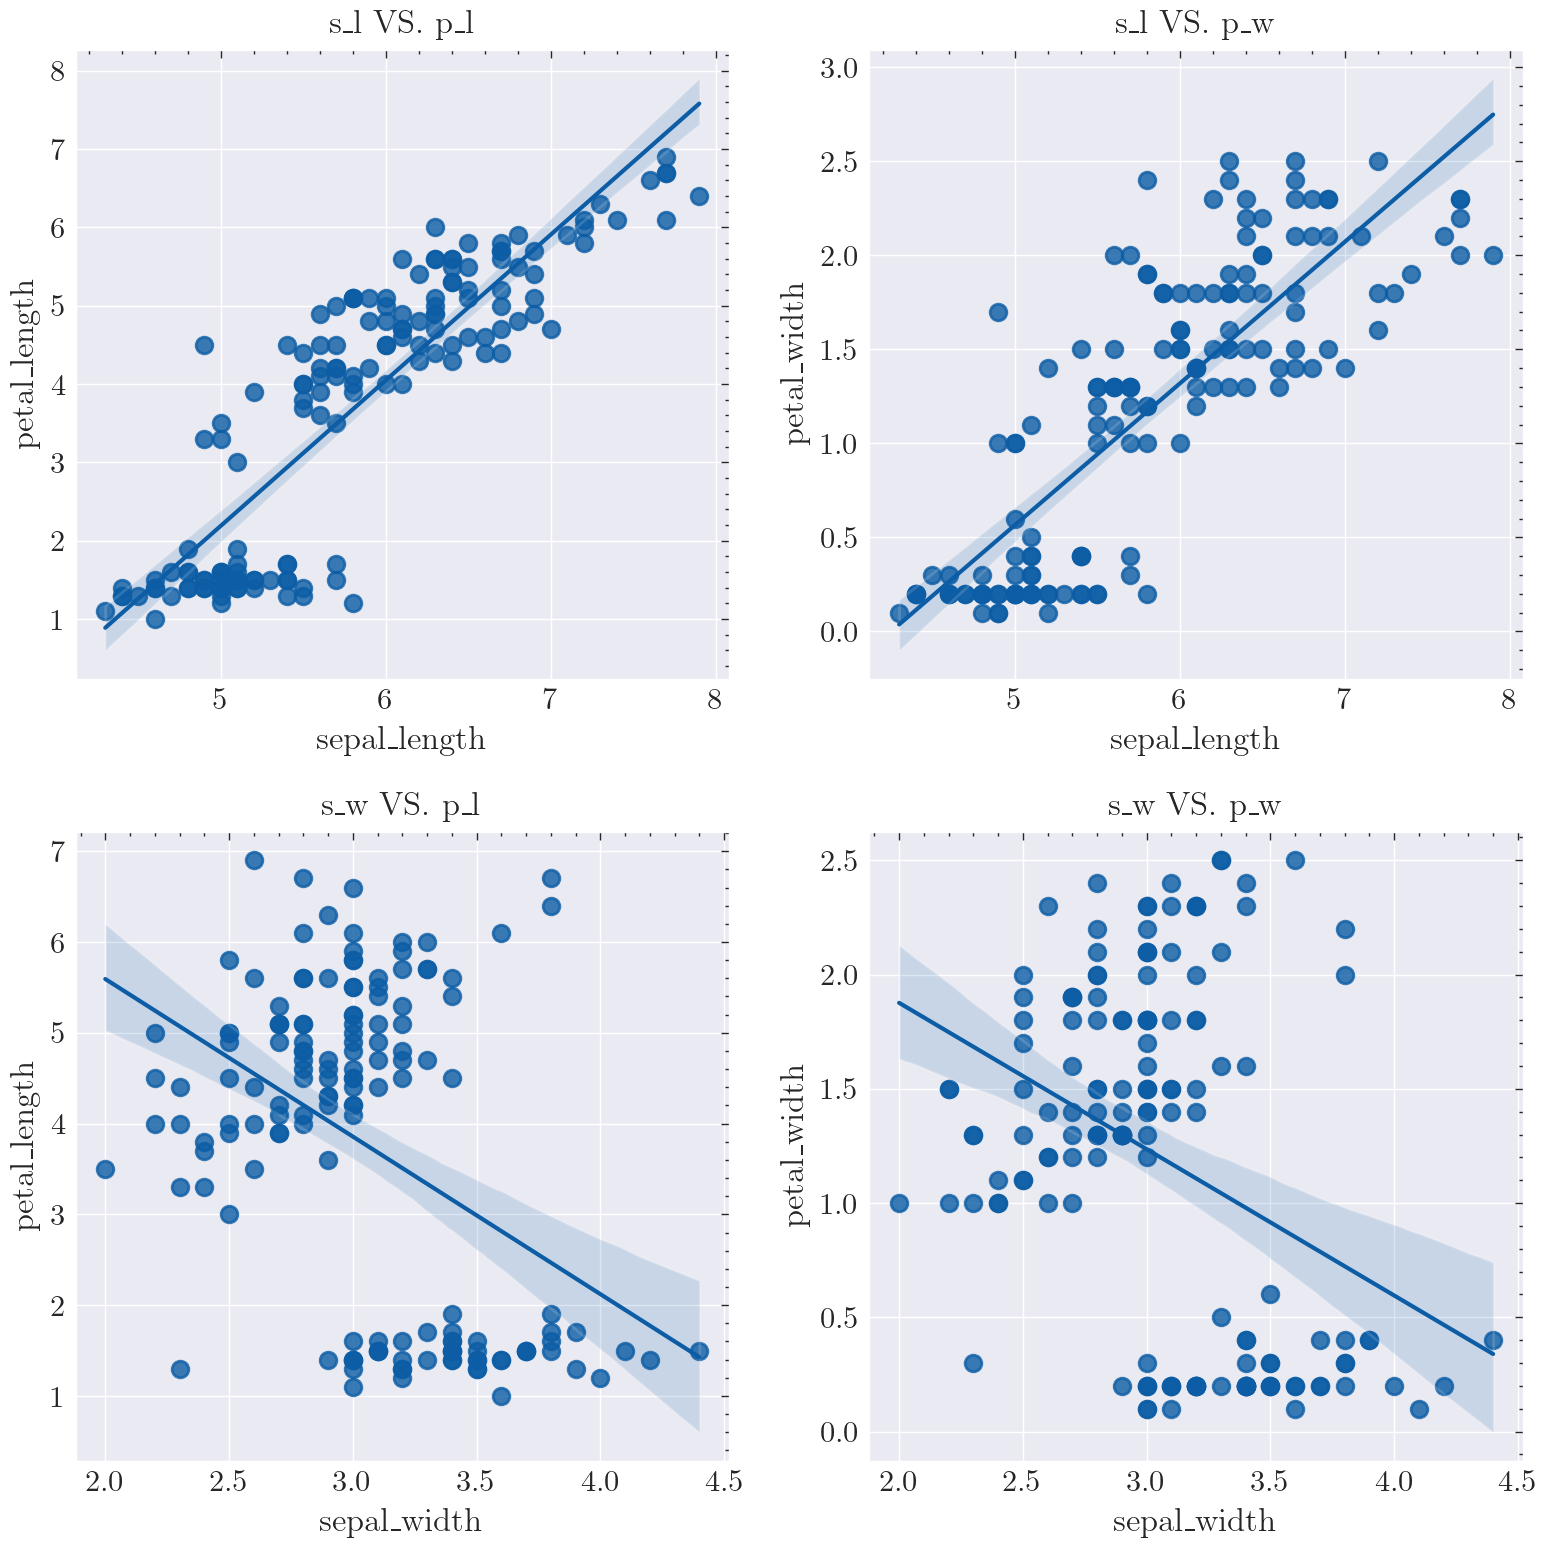

In [10]:
# 创建一个2x2的图表布局
fig, axs = plt.subplots(2, 2, figsize=(8, 8)) 

# sepal_length vs. petal_length
sns.regplot(x='sepal_length', y='petal_length', data=iris, ax=axs[0, 0])
axs[0, 0].set_title('s_l VS. p_l')


# # sepal_length vs. petal_width
sns.regplot(x='sepal_length', y='petal_width', data=iris, ax=axs[0, 1])
axs[0, 1].set_title('s_l VS. p_w')

# sepal_width vs. petal_length
sns.regplot(x='sepal_width', y='petal_length', data=iris, ax=axs[1, 0])
axs[1, 0].set_title('s_w VS. p_l')

# sepal_width vs. petal_width
sns.regplot(x='sepal_width', y='petal_width', data=iris, ax=axs[1, 1])
axs[1, 1].set_title('s_w VS. p_w')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

In [11]:
# 计算pearson相关系数
print("Pearson Correlation Coefficient between sepal_length and petal_length:", np.corrcoef(iris['sepal_length'], iris['petal_length'])[0, 1])
print("Pearson Correlation Coefficient between sepal_length and petal_width:", np.corrcoef(iris['sepal_length'], iris['petal_width'])[0, 1])
print("Pearson Correlation Coefficient between sepal_width and petal_length:", np.corrcoef(iris['sepal_width'], iris['petal_length'])[0, 1])
print("Pearson Correlation Coefficient between sepal_width and petal_width:", np.corrcoef(iris['sepal_width'], iris['petal_width'])[0, 1])

Pearson Correlation Coefficient between sepal_length and petal_length: 0.8717537758865831
Pearson Correlation Coefficient between sepal_length and petal_width: 0.8179411262715757
Pearson Correlation Coefficient between sepal_width and petal_length: -0.4284401043305394
Pearson Correlation Coefficient between sepal_width and petal_width: -0.36612593253643927


<span style="color:red;">
结论: sepal 的长度与 petal 的宽度和长度均呈正相关，且为极强相关；sepal 的宽度与 petal 的宽度和长度均呈负相关，且为中等程度相关和弱相关。
</span>

#### 2. 不同种类（species）鸢尾花萼片和花瓣的大小关系（提示：箱图或者提琴图）

In [12]:
#查看有几类
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Pearson Correlation Coefficient between sepal_length and petal_length
setosa: 0.26717575886875716
versicolor: 0.754048958592016
virginica: 0.8642247329355764
Pearson Correlation Coefficient between sepal_length and petal_width
setosa: 0.2780983529359696
versicolor: 0.5464610715986299
virginica: 0.28110770915731925
Pearson Correlation Coefficient between sepal_width and petal_length
setosa: 0.17769996678227068
versicolor: 0.560522091692982
virginica: 0.4010445773427854
Pearson Correlation Coefficient between sepal_width and petal_width
setosa: 0.2327520113628792
versicolor: 0.6639987200241115
virginica: 0.5377280262661887


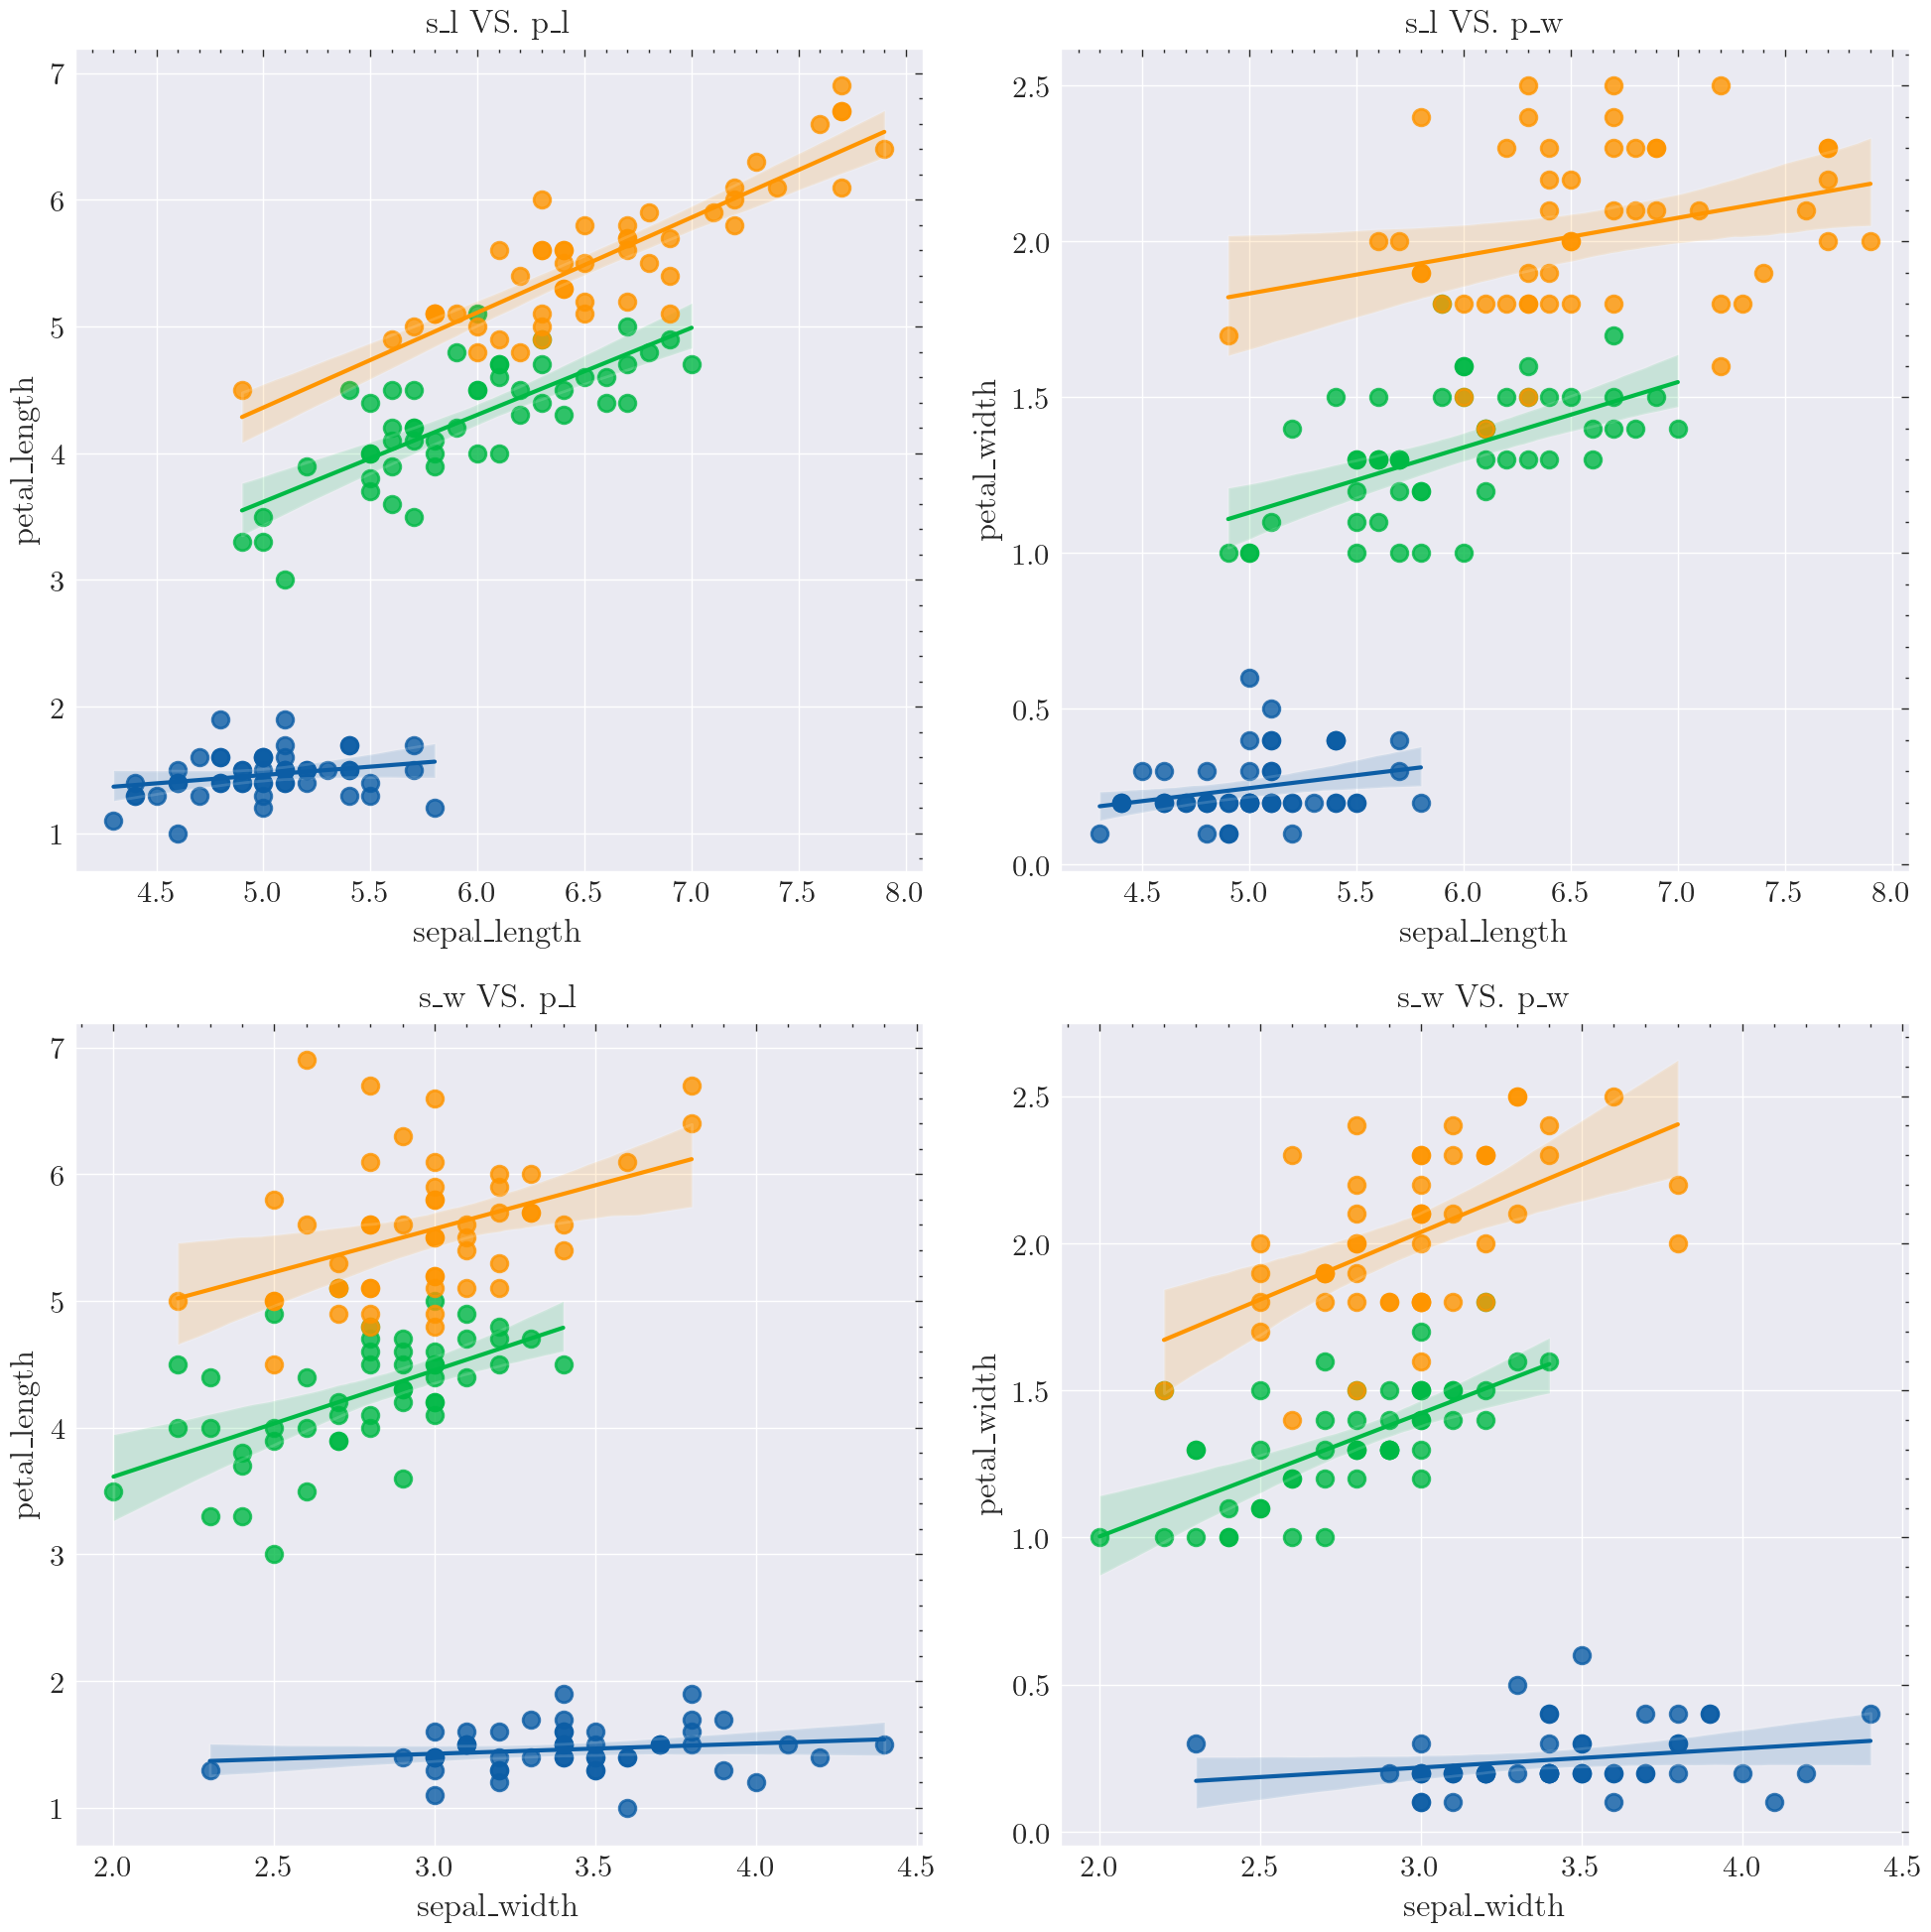

In [13]:
# 创建一个2x2的图表布局
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# sepal_length vs. petal_length
print("Pearson Correlation Coefficient between sepal_length and petal_length") # 提示下面打印出来的是Pearson系数
for species in iris['species'].unique():
    subdata = iris[iris['species'] == species]
    sns.regplot(x='sepal_length', y='petal_length', data=subdata, ax=axs[0, 0], label=species)
    print(species+":", np.corrcoef(subdata['sepal_length'], subdata['petal_length'])[0, 1]) # 打印各种类 Pearson 系数
axs[0, 0].set_title('s_l VS. p_l')

# sepal_length vs. petal_width
print("Pearson Correlation Coefficient between sepal_length and petal_width")
for species in iris['species'].unique():
    subdata = iris[iris['species'] == species]
    sns.regplot(x='sepal_length', y='petal_width', data=subdata, ax=axs[0, 1], label=species)
    print(species+":", np.corrcoef(subdata['sepal_length'], subdata['petal_width'])[0, 1])
axs[0, 1].set_title('s_l VS. p_w')

# sepal_width vs. petal_length
print("Pearson Correlation Coefficient between sepal_width and petal_length")
for species in iris['species'].unique():
    subdata = iris[iris['species'] == species]
    sns.regplot(x='sepal_width', y='petal_length', data=subdata, ax=axs[1, 0], label=species)
    print(species+":", np.corrcoef(subdata['sepal_width'], subdata['petal_length'])[0, 1])
axs[1, 0].set_title('s_w VS. p_l')

# sepal_width vs. petal_width
print("Pearson Correlation Coefficient between sepal_width and petal_width")
for species in iris['species'].unique():
    subdata = iris[iris['species'] == species]
    sns.regplot(x='sepal_width', y='petal_width', data=subdata, ax=axs[1, 1], label=species)
    print(species+":", np.corrcoef(subdata['sepal_width'], subdata['petal_width'])[0, 1])
axs[1, 1].set_title('s_w VS. p_w')

# 调整布局
plt.tight_layout()

# 显示图形
plt.show()

<span style="color:red;">
结论: 
    
    1）对于 setosa, sepal 和 petal 的大小均为正相关，且均为弱相关或极弱相关。
    2）对于 versicolor, sepal 和 petal 的大小均为正相关，其中 sepal 的长度与 petal 长度和 sepal 的宽度与 petal 宽度均为强相关，其它为中等程度相关。
    3）对于 virginica, sepal 和 petal 的大小均为正相关，其中 sepal 的长度与 petal 的长度为极强相关，sepal 的长度与 petal 的宽度为弱相关，其余均为中等程度相关。
</span>

#### 3. 不同种类鸢尾花萼片和花瓣大小的分布情况（六角箱图或者核密度估计）

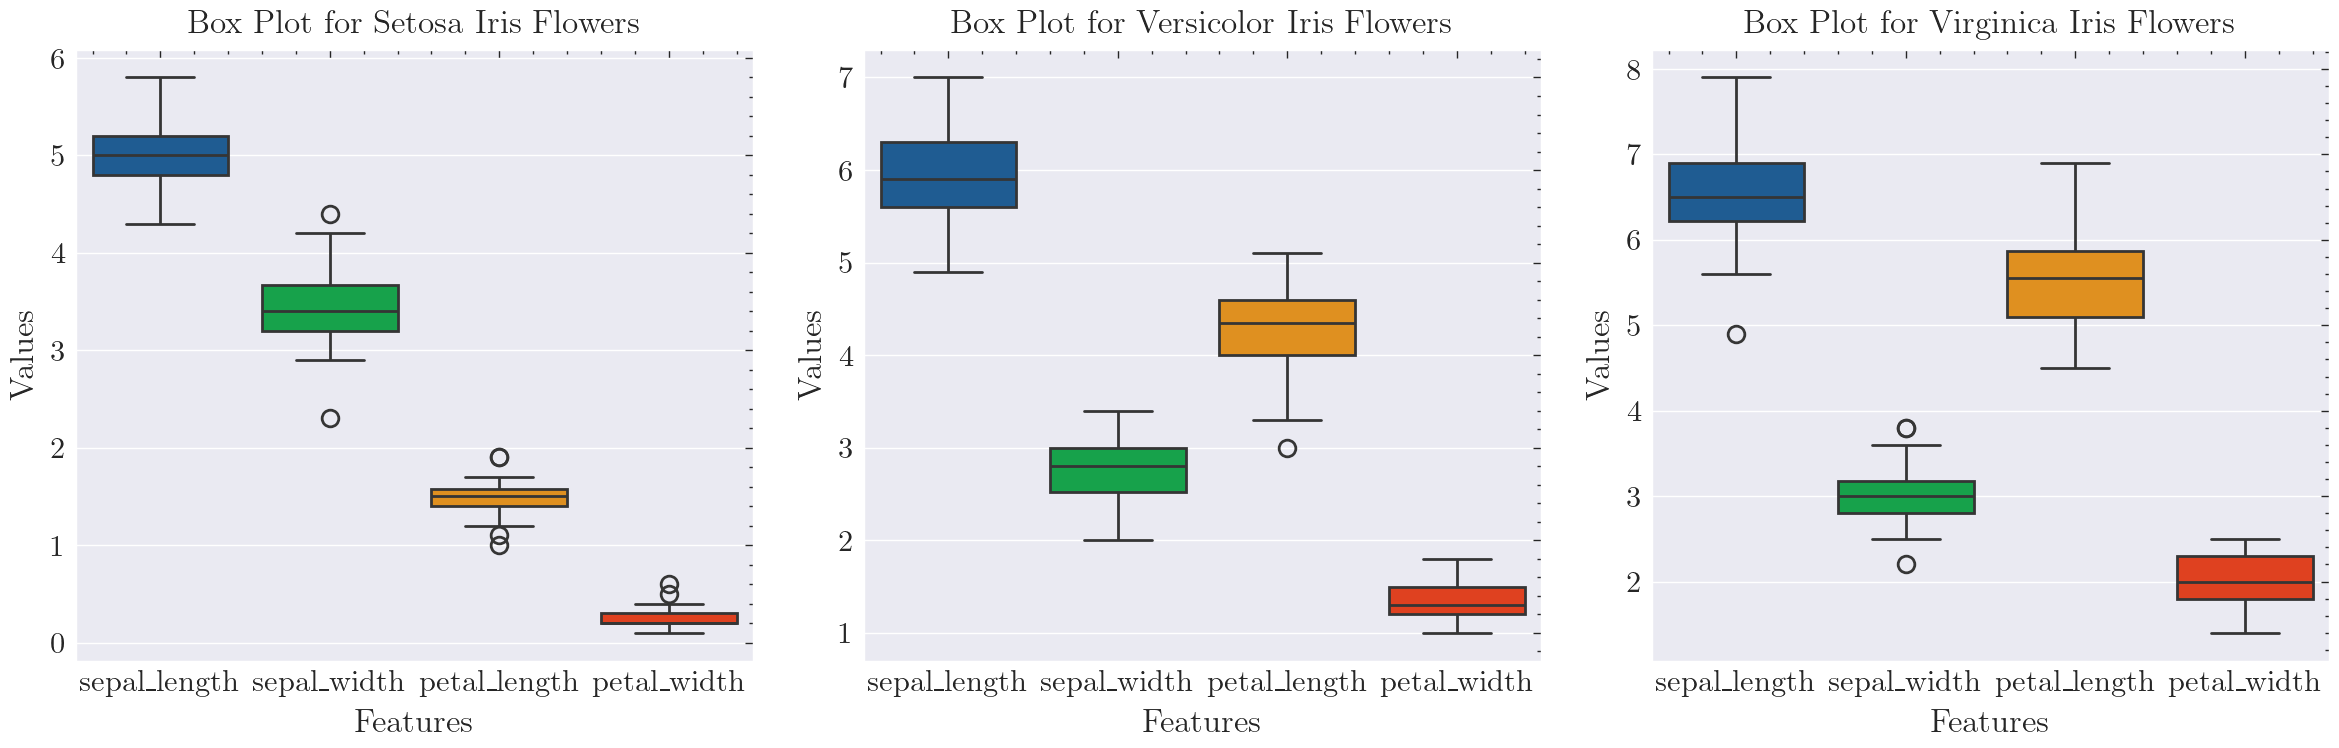

In [14]:
# 获取种类名称列表
species = iris['species'].unique()

# 创建一个3x1的图表布局
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# 循环画箱图
for i, (specie, ax) in enumerate(zip(species, axs.flatten())): # 遍历每个种类及其对应的轴
    subset = iris[iris['species'] == specie] # 筛选特定种类的鸢尾花数据
    sns.boxplot(data=subset.drop('species', axis=1), ax=ax) # 去掉 species 列
    
    # 设置标题
    ax.set_title(f'Box Plot for {specie.capitalize()} Iris Flowers')
    ax.set_xlabel('Features')
    ax.set_ylabel('Values')

# 调整子图间距
plt.tight_layout()

# 显示图形
plt.show()


<span style="color:red;">
结论: 
    
    1）对于 sepal 的长度和宽度，三个种类的数据范围都在2左右，且宽度的中心值都在3附近，而长度排序为：virginica, versicolor, setosa.
    2）对于 petal 的长度, 大小关系为：virginica, versicolor, setosa; 集中程度为：setosa, versicolor, virginica; 且 setosa 中心值偏大，其它的比较对称。
    3）对于 petal 的宽度, 大小关系为：virginica, versicolor, setosa; 集中程度为：setosa, versicolor, virginica; 且它们的中心值均偏小。
</span>

## 练习3：餐厅小费情况分析 (7个题)

1. 小费和总消费之间的关系（提示：散点图+回归分析）
2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）
3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）
4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）
5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）
6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）
7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

### 导入数据

In [15]:
tips = sns.load_dataset("tips")
tips.head()
# 总消费，小费，性别，吸烟与否，就餐星期，就餐时间，就餐人数

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [16]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### 设置全局参数

In [17]:
# 恢复seaborn默认设置
sns.set()

# 设置随机种子，同一个种子值，产生的随机数相同
np.random.seed(sum(map(ord, "regression"))) # ord 整型

# 使用 "science" 风格
plt.style.use('science') 

### 题目解答与绘图

#### 1. 小费和总消费之间的关系（提示：散点图+回归分析）

Pearson Correlation Coefficient between sepal_length and petal_length: 0.6757341092113641


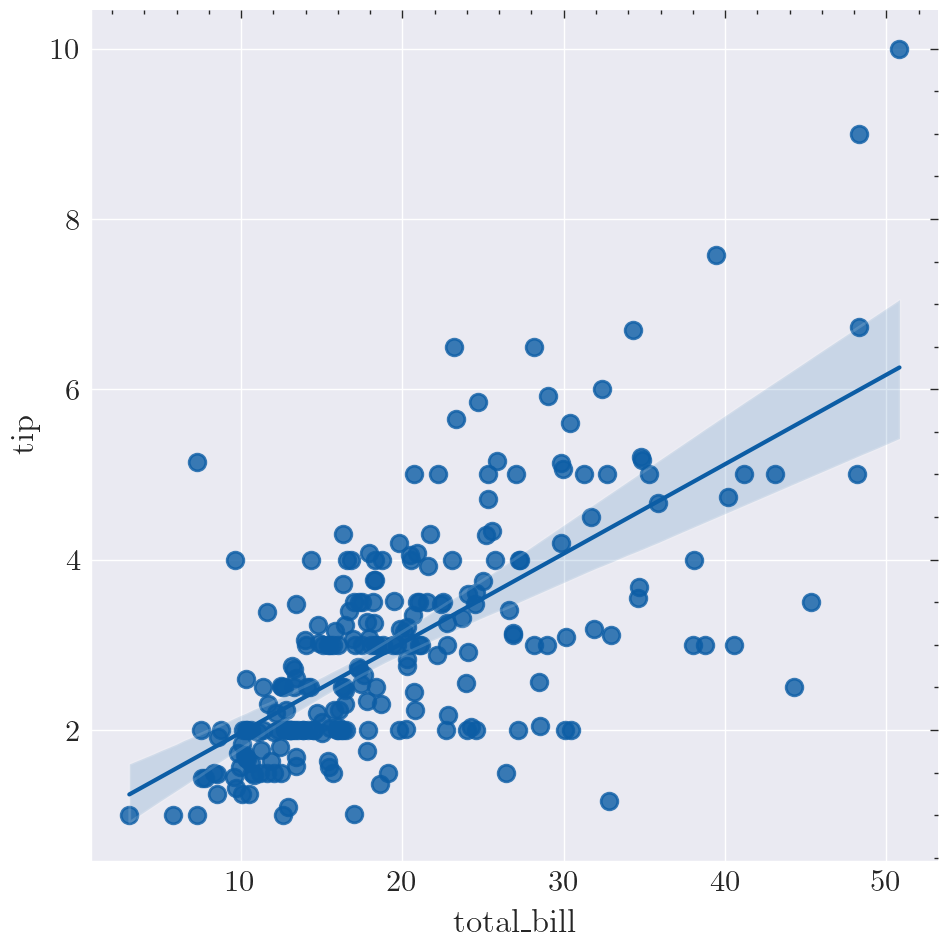

In [18]:
# 计算 Pearson 系数
print("Pearson Correlation Coefficient between sepal_length and petal_length:", np.corrcoef(tips['total_bill'], tips['tip'])[0, 1])

# 绘制散点图，并回顾分析
sns.lmplot(x="total_bill", y="tip", data=tips) # lmplot 函数可以绘制一个散点图，并在散点图上拟合一个线性回归模型

<span style="color:red;">
结论: 总消费越高，给小费的倾向就更高，而且这种正相关是强相关。
</span>

#### 2. 男性顾客和女性顾客，谁更慷慨（提示：箱图或者提琴图）

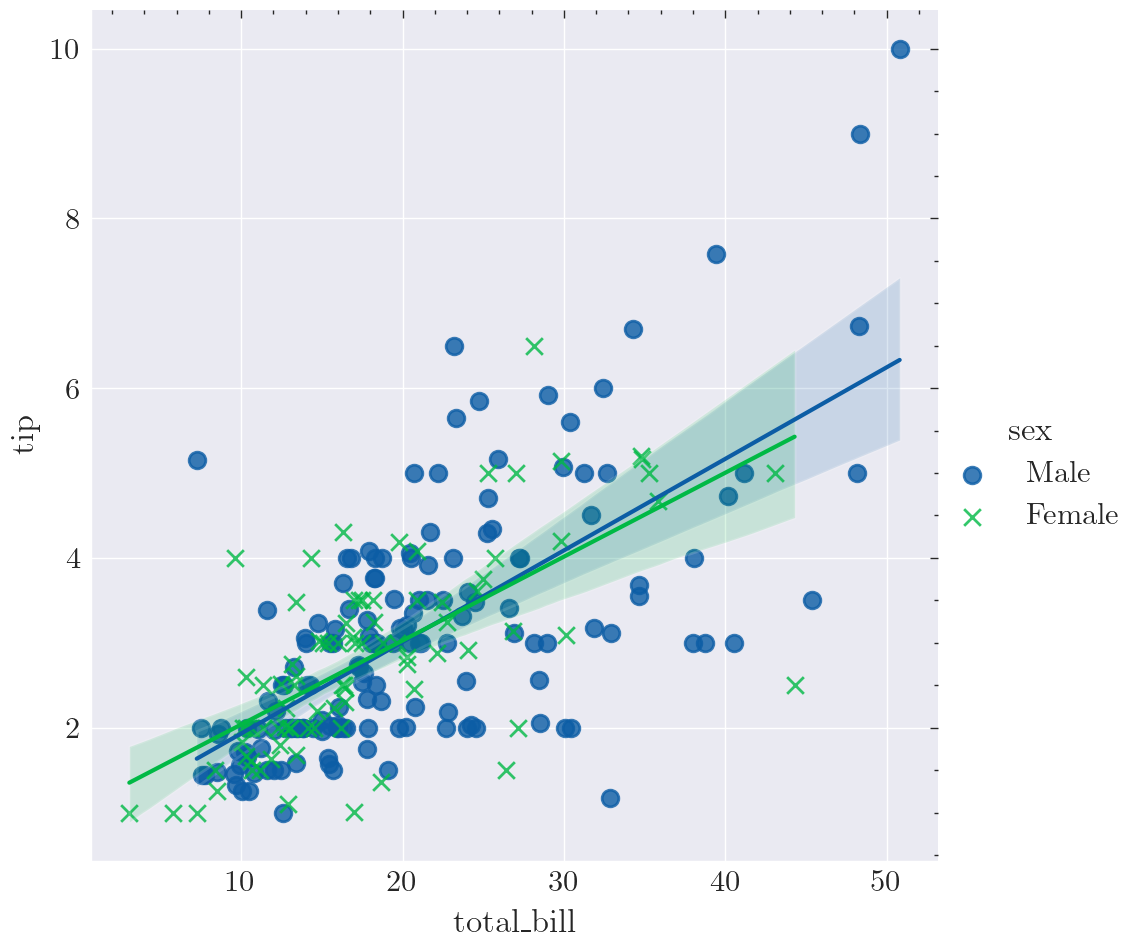

In [19]:
sns.lmplot(x="total_bill", y="tip", hue="sex", data=tips, markers=["o", "x"])
    # 斜率表示tip占total_bill的比例
    # hue="sex" 表示 sex 列中的不同类别（如“Male”和“Female”）将用不同的颜色表示。

<span style="color:red;">
结论: 男性要更慷慨一点，女性比男性给小费的时候更感性，给的比例变化可能更多。
</span>

#### 3. 抽烟与否是否会对小费金额产生影响（提示：箱图或者提琴图）

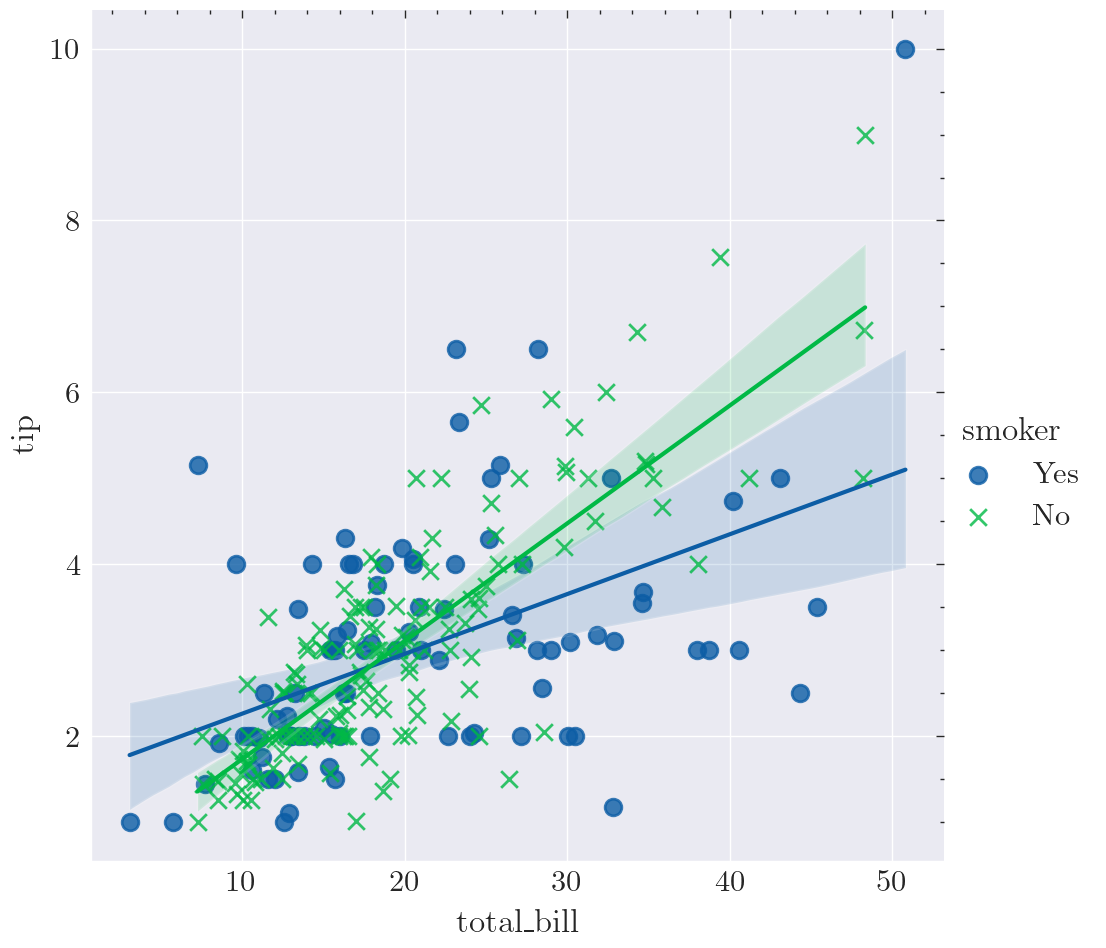

In [20]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips, markers=["o", "x"]) 

<span style="color:red;">
结论: 不吸烟者更慷慨，吸烟者给小费更随意。
</span>

#### 4. 工作日和周末，什么时候顾客给的小费更慷慨（提示：箱图或者提琴图）

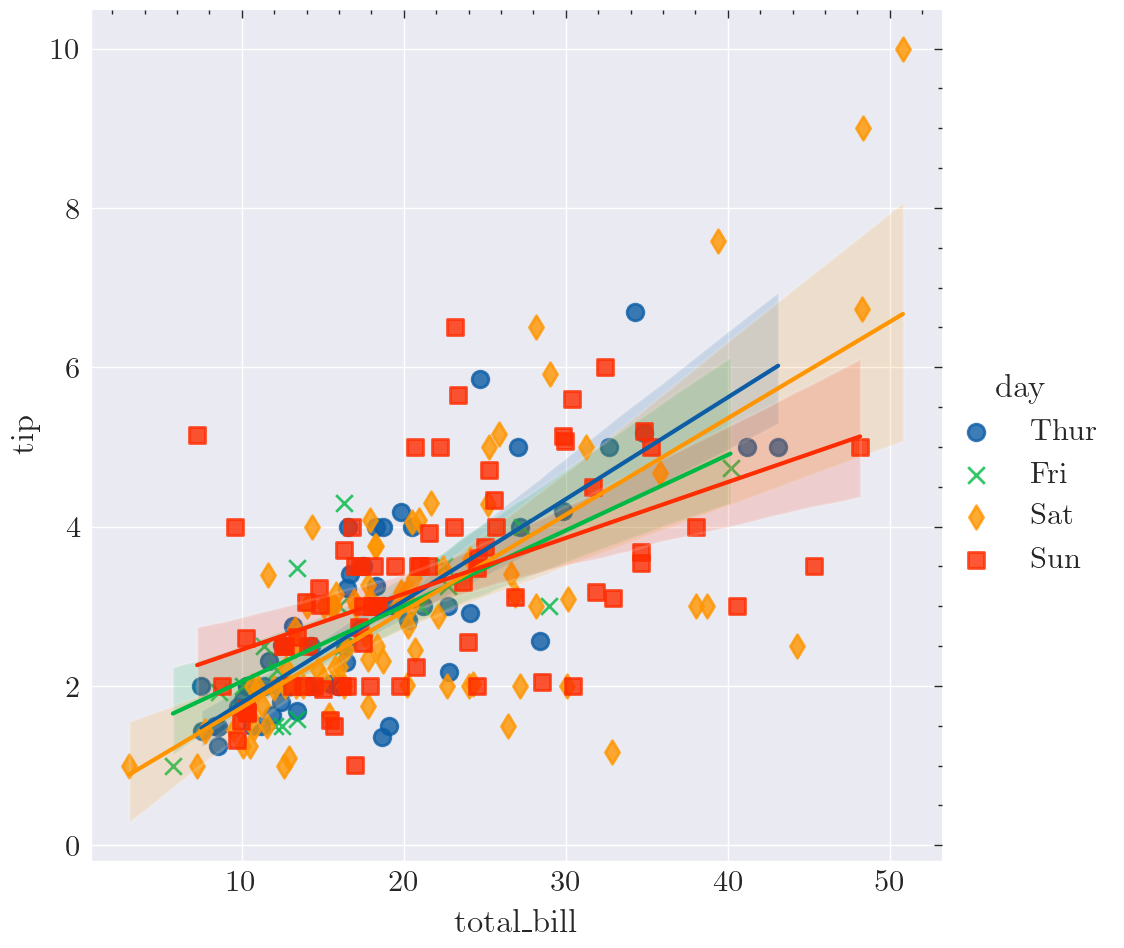

In [21]:
sns.lmplot(x="total_bill", y="tip", hue="day", data=tips, markers=["o", "x", "d", "s"])

<span style="color:red;">
结论: 总体而言，工作日比周末人们更慷慨, 且更随意一些。（咋和画箱图得到的结论不太一样呀）
</span>

#### 5. 午饭和晚饭，哪一顿顾客更愿意给小费（提示：箱图或者提琴图）

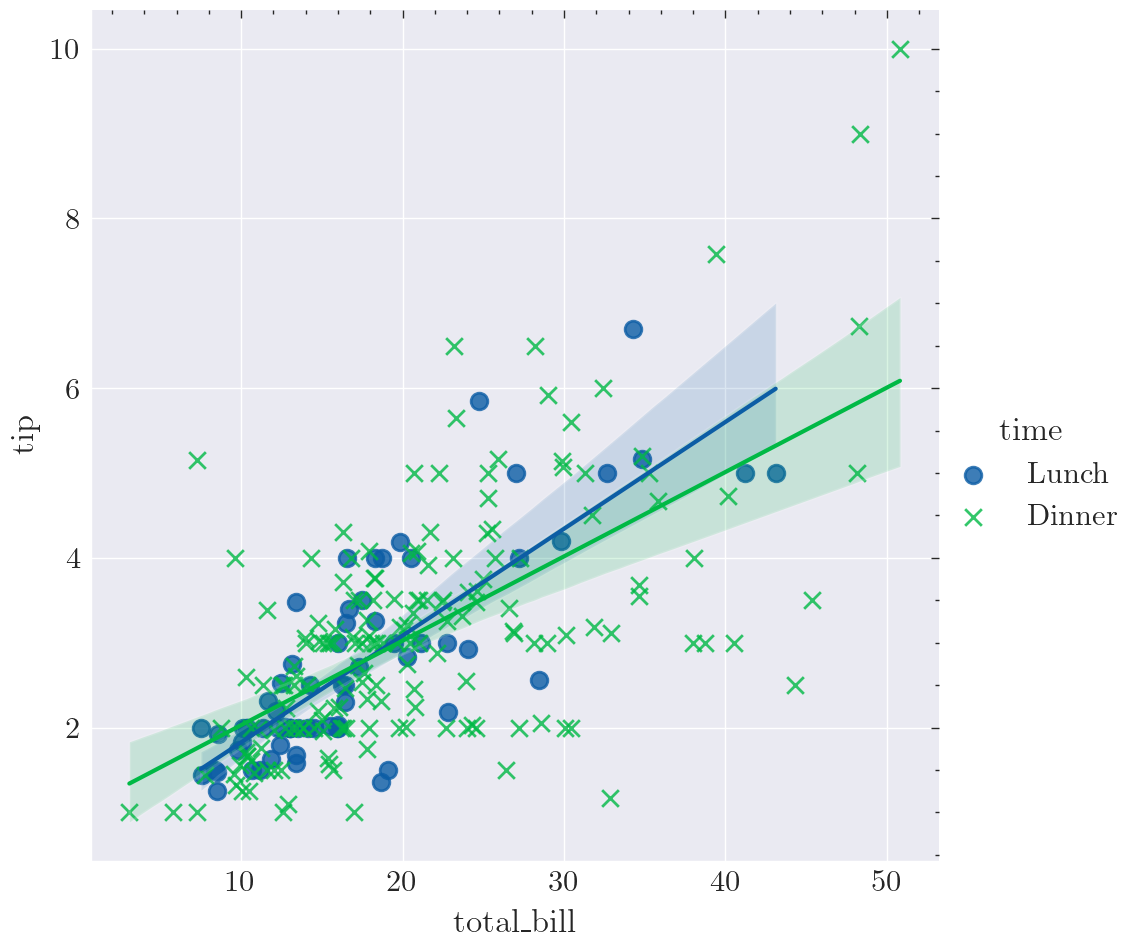

In [22]:
sns.lmplot(x="total_bill", y="tip", hue="time", data=tips, markers=["o", "x"])

<span style="color:red;">
结论: 晚饭时顾客更愿意给小费。
</span>

#### 6. 就餐人数是否会对慷慨度产生影响（提示：箱图或者提琴图）

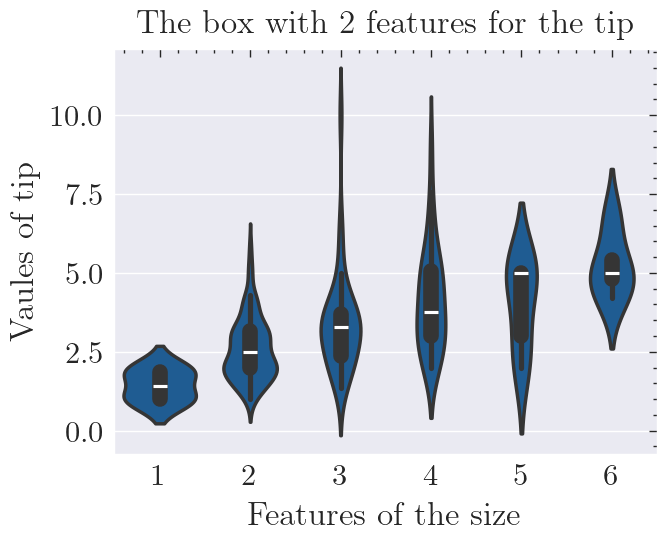

In [23]:
# 绘制提琴图
sns.violinplot(x='size', y='tip', data=tips)

# 添加标题和标签
plt.title('The box with 2 features for the tip')
plt.xlabel('Features of the size')
plt.ylabel('Vaules of tip')

# 显示图形
plt.show()

<span style="color:red;">
结论: 就餐人数越多，给高小费的倾向就越高。而一个人的时候给小费最理性。
</span>

#### 7. 性别+抽烟的组合因素对慷慨度的影响（提示：统计柱状图）

In [24]:
# 计算每个sex和smoker组合的小费
sex_smoker = tips.groupby(['sex', 'smoker'],observed=False)['tip'].mean().unstack()
print(sex_smoker)

smoker       Yes        No
sex                       
Male    3.051167  3.113402
Female  2.931515  2.773519


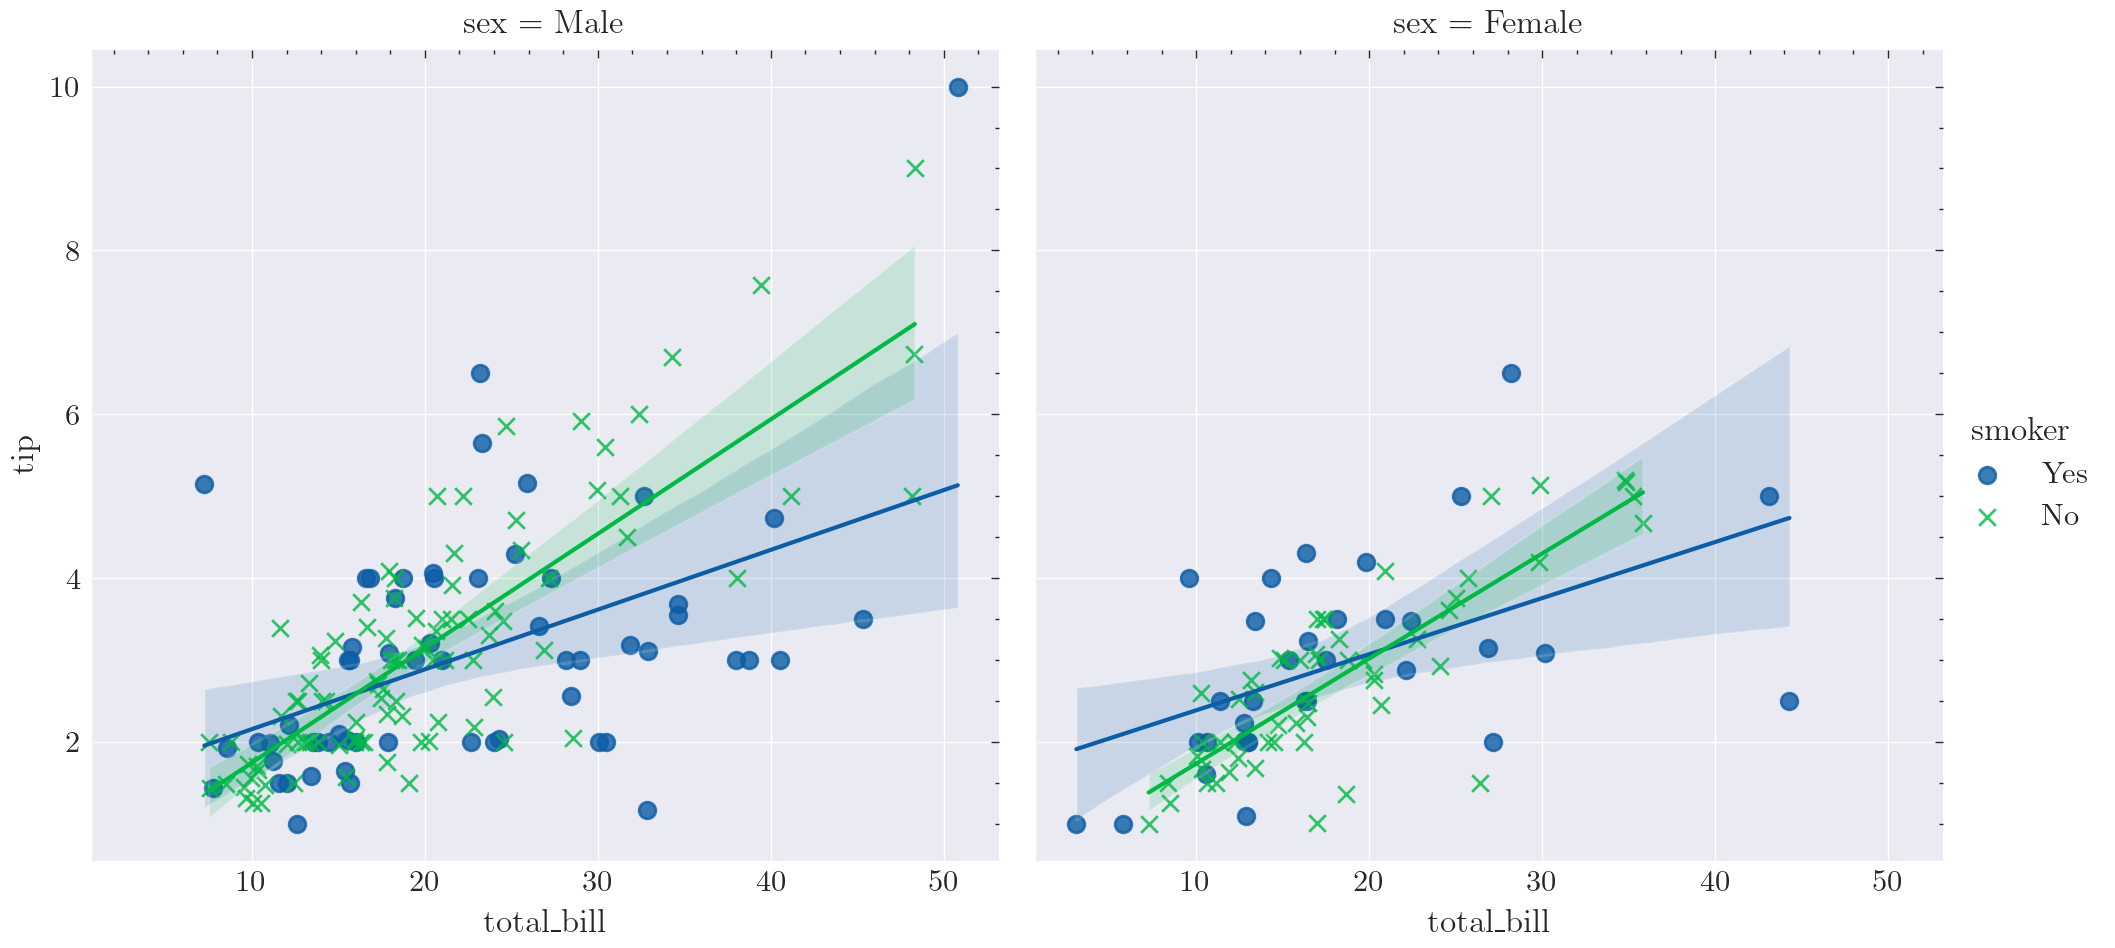

In [25]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="sex", data=tips, markers=["o", "x"]) # col表示不同列

<span style="color:red;">
结论: 对于男性和女性，都是不吸烟者更慷慨，而吸烟者都更随意。（跟直方图结果不一样）
</span>

## 练习4：泰坦尼克号海难幸存状况分析 (8个题)

1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）
2. 不同性别的幸存比例（提示：箱图或者提琴图）
3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）
4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）
5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）
6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）
7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）
8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

### 数据导入

In [26]:
titanic = sns.load_dataset("titanic")
titanic.head()
# 幸存与否，仓位等级，性别，年龄，堂兄弟姐妹数，父母子女数，票价，上船港口缩写，仓位等级，人员分类，是否成年男性，所在甲板，上船港口，是否幸存，是否单独乘船

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 设置全局参数

In [28]:
# 恢复seaborn默认设置
sns.set()

# 设置随机种子，同一个种子值，产生的随机数相同
np.random.seed(sum(map(ord, "regression"))) # ord 整型

# 使用 "science" 风格
plt.style.use('science') 

# 设置默认的DPI
plt.rc('figure', dpi=100)

# 设置默认的图形大小
plt.rc('figure', figsize=(5, 5))

### 题目解答与绘图

#### 1. 不同仓位等级中幸存和遇难的乘客比例（提示：箱图或者提琴图）

In [29]:
# 添加遇难列
titanic['unsurvived'] = 1 - titanic['survived']  

# 按仓位等级分组
survied_unsurvied = titanic.groupby('pclass')[['survived', 'unsurvived']].sum()

# 计算生存率和遇难率
survied_unsurvied['total'] = survied_unsurvied['survived'] + survied_unsurvied['unsurvived']
survied_unsurvied['survived_prop'] = survied_unsurvied['survived'] / survied_unsurvied['total']
survied_unsurvied['unsurvived_prop'] = survied_unsurvied['unsurvived'] / survied_unsurvied['total']

# 打印结果
print(survied_unsurvied)

        survived  unsurvived  total  survived_prop  unsurvived_prop
pclass                                                             
1            136          80    216       0.629630         0.370370
2             87          97    184       0.472826         0.527174
3            119         372    491       0.242363         0.757637


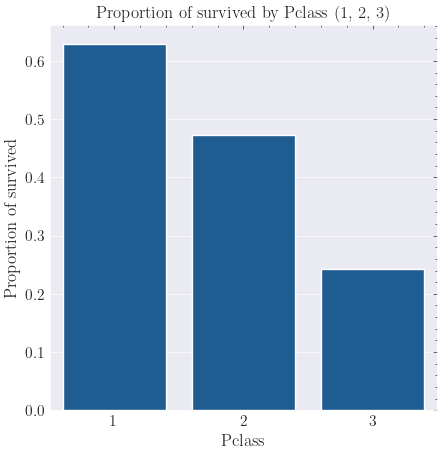

In [30]:
# 绘制柱状图
sns.barplot(x='pclass', y='survived_prop', data=survied_unsurvied)

# 添加标题和轴标签
plt.title('Proportion of survived by Pclass (1, 2, 3)')
plt.xlabel('Pclass')
plt.ylabel('Proportion of survived')

# 显示图形
plt.show()

<span style="color:red;">
结论: 仓位等级越高，生存率越高！
</span>

#### 2. 不同性别的幸存比例（提示：箱图或者提琴图）

In [31]:
# 添加遇难列
titanic['unsurvived'] = 1 - titanic['survived']  

# 按性别分组
sex = titanic.groupby('sex')[['survived', 'unsurvived']].sum()

# 计算生存率和遇难率
sex['total'] = sex['survived'] + sex['unsurvived']
sex['survived_prop'] = sex['survived'] / sex['total']
sex['unsurvived_prop'] = sex['unsurvived'] / sex['total']

# 打印结果
print(sex)

        survived  unsurvived  total  survived_prop  unsurvived_prop
sex                                                                
female       233          81    314       0.742038         0.257962
male         109         468    577       0.188908         0.811092


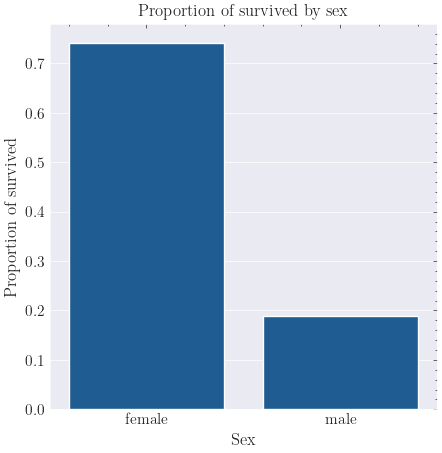

In [32]:
# 绘制柱状图
sns.barplot(x='sex', y='survived_prop', data=sex)

# 添加标题和轴标签
plt.title('Proportion of survived by sex')
plt.xlabel('Sex')
plt.ylabel('Proportion of survived')

# 显示图形
plt.show()

<span style="color:red;">
结论: 女性生存率更高！（这是为啥）
</span>

#### 3. 幸存和遇难乘客的票价分布（提示：箱图或者提琴图）

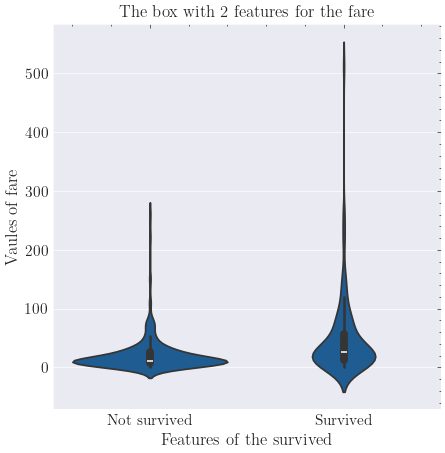

In [33]:
# 绘制提琴图
sns.violinplot(x='survived', y='fare', data=titanic)

# 添加标题和标签
plt.title('The box with 2 features for the fare')
plt.xlabel('Features of the survived')
plt.ylabel('Vaules of fare')
plt.xticks([0, 1], ['Not survived', 'Survived'])  # 重命名x轴标签

# 显示图形
plt.show()

<span style="color:red;">
结论: 遇难者的票价分布范围更小，且票价中值更低；幸存者则相反。似乎花的钱越多越能保证安全。
</span>

#### 4. 幸存和遇难乘客的年龄分布（提示：箱图或者提琴图）

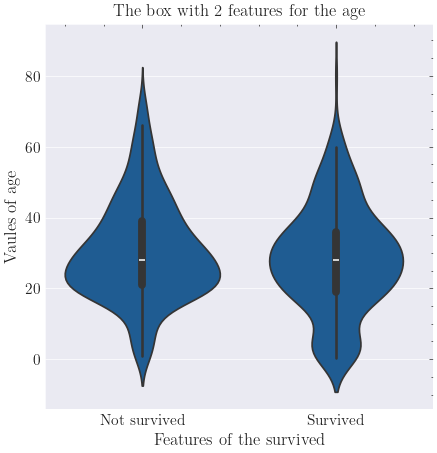

In [34]:
# 绘制提琴图
sns.violinplot(x='survived', y='age', data=titanic)

# 添加标题和标签
plt.title('The box with 2 features for the age')
plt.xlabel('Features of the survived')
plt.ylabel('Vaules of age')
plt.xticks([0, 1], ['Not survived', 'Survived'])  # 重命名x轴标签

# 显示图形
plt.show()

<span style="color:red;">
结论: 遇难与否与年龄没有明显相关性，而遇难者的年龄更集中（与箱图的结论不太一样）
</span>

#### 5. 不同上船港口的乘客仓位等级分布（提示：箱图或者提琴图）

In [35]:
# 计算每个Pclass和Embarked组合的乘客数量
Embarked = titanic.groupby(['embarked','pclass']).size().reset_index(name='number')
print(Embarked)

  embarked  pclass  number
0        C       1      85
1        C       2      17
2        C       3      66
3        Q       1       2
4        Q       2       3
5        Q       3      72
6        S       1     127
7        S       2     164
8        S       3     353


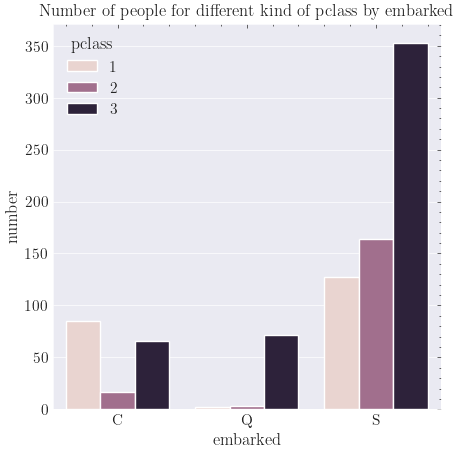

In [36]:
# 绘制柱状图
sns.barplot(x='embarked', y='number', hue='pclass', data=Embarked)

# 添加标题和轴标签
plt.title('Number of people for different kind of pclass by embarked')

# 显示图形
plt.show()

<span style="color:red;">
结论: 在 S 港上船的各仓位人数都是最多的，且 S 港和 Q 港的 3 等仓人数最多，而 C 港的 1 等仓人数最多。
</span>

#### 6. 幸存和遇难乘客堂兄弟姐妹的数量分布（提示：箱图或者提琴图）

In [37]:
# 按 sibsp 分组求和
titanic['unsurvived'] = 1 - titanic['survived']
titanic['total'] = titanic['survived'] + titanic['unsurvived']
titanic.groupby('sibsp')['total'].sum()

sibsp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: total, dtype: int64

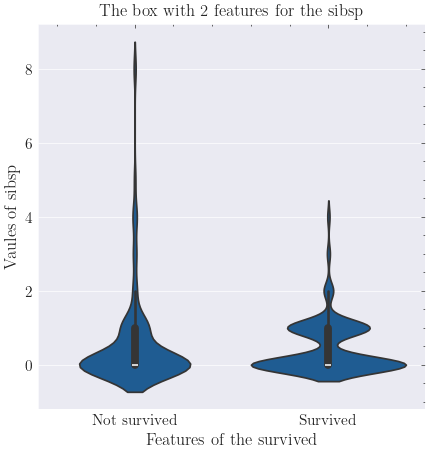

In [38]:
# 绘制提琴图
sns.violinplot(x='survived', y='sibsp', data=titanic)

# 添加标题和标签
plt.title('The box with 2 features for the sibsp')
plt.xlabel('Features of the survived')
plt.ylabel('Vaules of sibsp')
plt.xticks([0, 1], ['Not survived', 'Survived'])  # 重命名x轴标签

# 显示图形
plt.show()

<span style="color:red;">
结论: sibsp越少越容易幸存，而且绝大多数乘客没有或只有一个 sibsp. （与箱图结论不一样）
</span>

#### 7. 幸存和遇难乘客父母子女的数量分布（提示：箱图或者提琴图）

In [39]:
# 按 parch 分组求和
titanic.groupby('parch')[['survived','unsurvived','total']].sum()

,survived,unsurvived,total
parch,,,
0,233,445,678
1,65,53,118
2,40,40,80
3,3,2,5
4,0,4,4
5,1,4,5
6,0,1,1


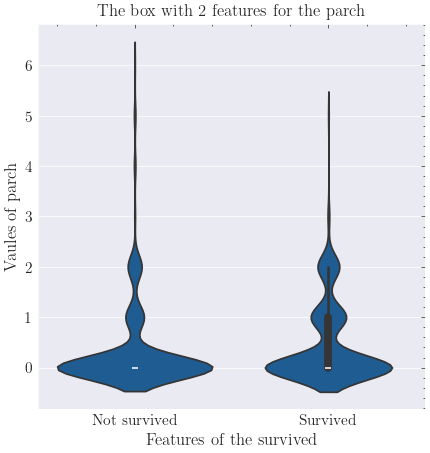

In [40]:
# 绘制提琴图
sns.violinplot(x='survived', y='parch', data=titanic)

# 添加标题和标签
plt.title('The box with 2 features for the parch')
plt.xlabel('Features of the survived')
plt.ylabel('Vaules of parch')
plt.xticks([0, 1], ['Not survived', 'Survived'])  # 重命名x轴标签

# 显示图形
plt.show()

<span style="color:red;">
结论: 遇难者中绝大多数都是 parch=0 的乘客，而幸存者中 parch=0 的乘客虽然也占绝大多数，但占比相对较低。可能是有父母子女的人求生欲望更高
</span>

#### 8. 单独乘船与否和幸存之间有没有联系（提示：统计柱状图）

In [41]:
# 计算每个Pclass和Embarked组合的乘客数量
alone = titanic.groupby(['alone','survived']).size().reset_index(name='Number of people')
print(alone)

   alone  survived  Number of people
0  False         0               175
1  False         1               179
2   True         0               374
3   True         1               163


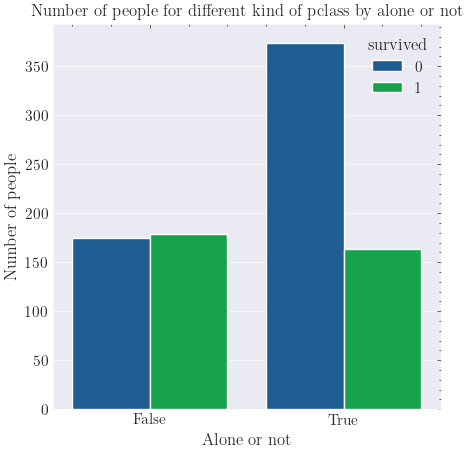

In [42]:
# 绘制柱状图
sns.barplot(x='alone', y='Number of people', hue='survived', data=alone)

# 添加标题和轴标签
plt.title('Number of people for different kind of pclass by alone or not')
plt.xlabel('Alone or not')

# 显示图形
plt.show()

<span style="color:red;">
结论: 单独登船的人死亡率更高，同伴之间的互相帮助有助于生存。
</span>